# Thompson Sampling

**1. Data Preprocessing**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataframe = pd.read_csv('Ads_CTR_Optimisation.csv')
dataframe.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


**2. Implementation**

Step 1:

In [32]:
import random

In [33]:
N = 10000
d = 10

In [34]:
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

In [35]:
ad_selected = []
total_reward = 0

Step 2:

In [36]:
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ad_selected.append(ad)
    reward = dataframe.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

In [37]:
print('Total Reward: {}'.format(total_reward))

Total Reward: 2580


In [48]:
print('first 20: {}'.format(ad_selected[:20]))
# Converge to ad number 4
print('last 20: {}'.format(ad_selected[-20:]))

first 20: [2, 0, 3, 8, 6, 1, 1, 1, 9, 8, 4, 5, 7, 5, 2, 1, 7, 7, 0, 9]
last 20: [4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


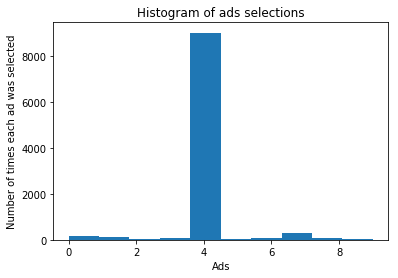

In [39]:
plt.hist(ad_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [40]:
numbers_of_rewards_0

[148, 98, 50, 61, 6610, 28, 82, 249, 67, 27]

In [41]:
numbers_of_rewards_1

[33, 19, 5, 8, 2427, 0, 13, 65, 10, 0]